Example from VMLS Section 13.1.1

In [4]:
import numpy as np
from numpy.linalg import cholesky as llt
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica Neue"],
    "font.size": 28,
})

In [5]:
def forward_substitution(L, b):
    n = L.shape[0]
    x = np.zeros(n)
    for i in range(n):
        x[i] = (b[i] - L[i,:i] @ x[:i])/L[i, i]
    return x

def backward_substitution(U, b):
    n = U.shape[0]
    x = np.zeros(n)
    for i in reversed(range(n)):
        x[i] = (b[i] - U[i,i+1:] @ x[i+1:])/U[i, i]
    return x

def lstsq(A, b):
    M = A.T.dot(A)
    q = A.T.dot(b)
    L = llt(M)
    x = forward_substitution(L, q)
    x = backward_substitution(L.T, x)
    return x, L

In [25]:
# 34-vector with the world annual petroleum consumption between 1980 and 2013, 
# in million barrels/day (discussed on VMLS page 252).
y = np.array([ 
    63122, 60953, 59551, 58785, 59795, 60083, 61819, 63107, 64978, 66090, 
    66541, 67186, 67396, 67619, 69006, 70258, 71880, 73597, 74274, 75975, 
    76928, 77732, 78457, 80089, 83063, 84558, 85566, 86724, 86046, 84972, 
    88157, 89105, 90340, 91195 ])/1000
year_start = 1980
N = len(y)
x = np.arange(N)

In [26]:
# Solve least squares
A = np.hstack([np.ones((N, 1)), x.reshape(-1, 1)])
theta, L = lstsq(A, y)

def f_model(x, theta):
    return theta[0] + theta[1] * x

y_hat = f_model(x, theta)

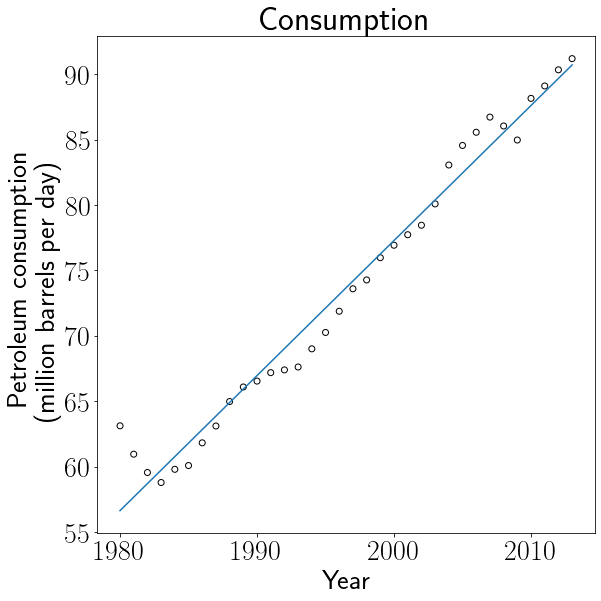

In [37]:
# Plot fit line
fig, ax = plt.subplots(1,1, figsize=(9, 9))
ax.scatter(x + year_start, y, marker='o', color='k', facecolors='none')
ax.plot(x + year_start, y_hat)
ax.set_title('Consumption')
ax.set_xlabel(r'Year')
ax.set_ylabel(r'Petroleum consumption\\(million barrels per day)')
plt.tight_layout()
plt.savefig('1d_fit_petroleum.pdf')

In [28]:
theta

array([56.63750084,  1.03257036])

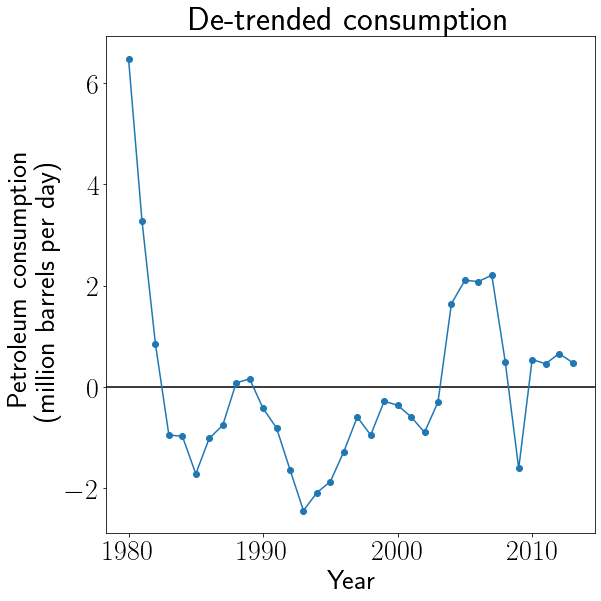

In [36]:
# Plot detrend
fig, ax = plt.subplots(1,1, figsize=(9, 9))
# ax.scatter(x + year_start, y - y_hat, marker='o', color='k', facecolors='none')
plt.axhline(y=0, color='k', linestyle='-')
ax.plot(x + year_start, y - y_hat, marker='o')
ax.set_title('De-trended consumption')
ax.set_xlabel(r'Year')
ax.set_ylabel(r'Petroleum consumption\\(million barrels per day)')
plt.tight_layout()
plt.savefig('1d_fit_petroleum_detrended.pdf')